# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information from over 100k medical appointments in Brazil, and whether the appointment was attended by the patient or not. This dataset also contains a number of different characteristics about the patient, and the location where the appointment took place.

> To get an better understanding of the data collected, let's interpret what each column means:
> 1. *PatientId*
    - This is a unique id associated with a specific patient.
    
> - *AppointmentID*
    - This is the unique id associated with the specific appointment.
    
> - *Gender*
    - Indicates whether the patient is male or female.
    
> - *ScheduledDay*
    - This is the date on which the appointment was made.
    
> - *AppointmentDay*
    - The date for which the appointment was made.
    
> - *Age*
    - The age of the patient.
    
> - *Neighbourhood*
    - The area in which the appointment was schedueled to take place. Remember, this data is specific to Brazil, therefore all these location are in Brazil.
    
> - *Scholarship*
    - Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    
> - *Hipertension*
    - If the patient is diagnosed with hypertension.
    
> - *Diabetes*
    - If the patient is diagnosed with diabetes.
    
> - *Alcoholism*
    - If the patient suffers from alcoholism.
    
> - *Handcap*
    - If the patient is handicapped.
    
> - *SMS_received*
    - Whether the patient received an SMS reminder about his/her appointment.
    
> - *No-show*
    - This shows us if the patient did or did not show up for his/her appointment. 'Yes' means they did not show up, 'No' means they did show up.

### Question(s) for Analysis

> In order to be successful with the analysis, we need to think of some questions which we want answers to. These questions will help guide our analysis and find conclusions. The dependent variable for this data is the no-show column. We want to determine if there are specific factors which might influence whether or not a person is a no-show.
- Does the location of an appointment have an influence on whether a person shows up for an appointment?
- Are appointments schedueled in advance more likely to be attended oppposed to appointments made for the same day?
- Are men or women more likely to be a no-show to their medical appoinments?
- Are seniors more likely than adults to attend their medical appointments?
- Do SMS reminders to the patient have an effect on whether they attend their appointments?


In [1]:
# Imports that we'll need for the analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load the data into a pandas dataframe

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.groupby("PatientId").count()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
3.921784e+04,1,1,1,1,1,1,1,1,1,1,1,1,1
4.374176e+04,1,1,1,1,1,1,1,1,1,1,1,1,1
9.377953e+04,1,1,1,1,1,1,1,1,1,1,1,1,1
1.417242e+05,1,1,1,1,1,1,1,1,1,1,1,1,1
5.376153e+05,1,1,1,1,1,1,1,1,1,1,1,1,1
5.628261e+06,1,1,1,1,1,1,1,1,1,1,1,1,1
1.183186e+07,1,1,1,1,1,1,1,1,1,1,1,1,1
2.263866e+07,2,2,2,2,2,2,2,2,2,2,2,2,2
5.216894e+07,2,2,2,2,2,2,2,2,2,2,2,2,2


#### Amount of Rows and Columns

In [4]:
df.shape

(110527, 14)

> We see there are **110,527** records in this dataset which tells us that there are over 100k appoinments recorded in this dataset. Also note that there are **14** columns in the dataset.

In [5]:
# Save the record count for later use
record_count = 110527

#### Column names

In [6]:
# See which columns we have
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

> Here we can see which columns are containted within the dataset.

#### Data types for each column

In [7]:
# View each column's datatype
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> By viewing the datatypes of each column, notice that ScheduledDay and AppointmentDay is of type object. To make this information more usable, we can try to convert it into a datetime format instead.

#### Are there missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> There does not appear to be any missing values in the dataset.

#### Are there duplicates in the dataset?

In [9]:
df.duplicated().sum()

0

> There are no duplicated appointments in this dataset.

#### How many unique values are there for each column?

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> Out of **110527** appointments, there are **62299** unique patients. This means some of the patients captured in this dataset had more than 1 appointment.

> We see that appointments took place accross **81** different neighbourhoods. 


### Data Cleaning

> Let's have a look at the data again:
 

In [11]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We notice that the data is mostly clean. 
- There are no duplicated rows and 
- The column names are correct. 

There is something that we can 'clean', which are the columns **'ScheduledDay'** and **'AppointmentDay'**. 
Currently it is of type object (which is a pointer to a string) which is not useful since no date or time calculations can be performed. Instead, let's convert it into a **datetime** format which will make performing date opertations really simple. 

Lets start by removing the letters 'T' and 'Z' in these rows.

Note that the time for AppointmentDay is not present in the dataset since all the rows have time as 00:00:00 which means **we can remove this data for time entirely.**

Also, we don't need time for 'ScheduledDay' to answer any of our questions, so we can seperate this into it's own column in case we might need it at a later stage.

Replace the character T with a space to seperate the date from the time.

In [12]:
df['ScheduledDay'] = df['ScheduledDay'].str.replace('T', ' ')

Now we can simply remove the character 'Z' from the rows which appears after the time:



In [13]:
df['ScheduledDay'] = df['ScheduledDay'].str.replace('Z', '')

In [14]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now we can also remove these characters from the 'AppointmentDay' collumn, but take a look at the rows in this column

In [15]:
df['AppointmentDay'].head()

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

> All the appointments seem to not have the time added for the time of the appointment. This means that we can simply remove all characters after (and including) the character 'T'. We can do this by removing all characters after the index 9, since each row contains the date in the following format 'YYYY-MM-DD' which is 10 characters, from index 0 to 10.

In [16]:
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

Let's see how our dates are looking:

In [17]:
df[ ['ScheduledDay', 'AppointmentDay'] ].head()

,ScheduledDay,AppointmentDay
0,2016-04-29 18:38:08,2016-04-29
1,2016-04-29 16:08:27,2016-04-29
2,2016-04-29 16:19:04,2016-04-29
3,2016-04-29 17:29:31,2016-04-29
4,2016-04-29 16:07:23,2016-04-29


It might be a better idea to split the 'ScheduledDay' column into 2 seperate columns by extracting the time and creating a new column called 'ScheduledTime'. This will allow us to have an extra column which we might be able to make use of on a later stage. The time starts at index 11 and goes up to index 18. Let's add these characters to a new column:

In [18]:
df['ScheduledTime'] = df['ScheduledDay'].str[11:19]
df['ScheduledTime'].head()

0    18:38:08
1    16:08:27
2    16:19:04
3    17:29:31
4    16:07:23
Name: ScheduledTime, dtype: object

Let's remove the time from the 'ScheduledDay' column since we have this information in our newly created column.

In [19]:
df.ScheduledDay = df.ScheduledDay.str[:10]

Now we can convert the formats from object to date (and to time for our 'ScheduledTime' column)

In [20]:
df[["AppointmentDay", "ScheduledDay"]] = df[["AppointmentDay", "ScheduledDay"]].apply(pd.to_datetime)

Let's look at our datatypes again to see if we did it right:

In [21]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
ScheduledTime             object
dtype: object

In [22]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23


<a id='eda'></a>
## Exploratory Data Analysis

> - Does the location of an appointment have an influence on whether a person shows up for an appointment?
- Are appointments schedueled in advance more likely to be attended oppposed to appointments made for the same day?
- Are men or women more likely to be a no-show to their medical appoinments?
- Are seniors more likely than adults to attend their medical appointments?
- Do SMS reminders to the patient have an effect on whether they attend their appointments?




In [23]:
# Lets create a function to create a bar plot for data provided:
def bar_plot(df, x_ticks, bars_height , xlabel, ylabel, title):
    plt.bar(x=x_ticks, height=bars_height, data=df)

    # Set the x label of the graph
    plt.xlabel(xlabel)

    # Set the y label of the graph
    plt.ylabel(ylabel)

    plt.title(title);

Before we begin trying to answer these questions, let's have a closer look at each of our columns/features, and how they are distributed.

#### ScheduledDay

Let's find out more about the "ScheduledDay" column. We can find out which days of the week most appointments were made by grouping our data by the day of the week, followed by counting the values.

In [24]:
scheduled_day_counts = df.groupby(df["ScheduledDay"].dt.dayofweek)['No-show'].count().sort_values()
scheduled_day_counts

ScheduledDay
5       24
3    18073
4    18915
0    23085
2    24262
1    26168
Name: No-show, dtype: int64

Above, we can see the counts of how many patients made appointments on which days of the week. The days are indicated by numbers from 0 (Monday) to 6 (Sunday). Interesting, we can see that there were **no patients who called on a Sunday**. Let's visualize this:

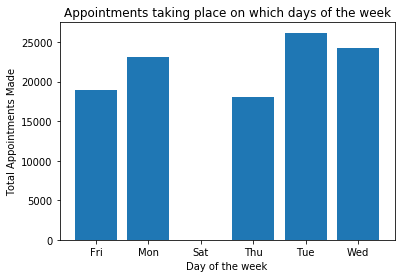

In [25]:
# Create the bar chart by providing the values for each of the bars
# Create the x values for the bars
x=["Sat", "Thu", "Fri", "Mon", "Wed", "Tue"]

# Create the bar chart by calling our function
bar_plot(df, x, scheduled_day_counts, "Day of the week", "Total Appointments Made", "Appointments taking place on which days of the week")

Most appointments were made on a Tuesday, followed by on a Wednesday. There were no appointments made on a Sunday, and barely any on a Saturay.

#### AppointmentDay

In [26]:
# Get the count for appointments made on seperate days of the week
appointments_day_count = df.groupby(df['AppointmentDay'].dt.dayofweek)['No-show'].count().sort_values()
appointments_day_count

AppointmentDay
5       39
3    17247
4    19019
0    22715
1    25640
2    25867
Name: No-show, dtype: int64

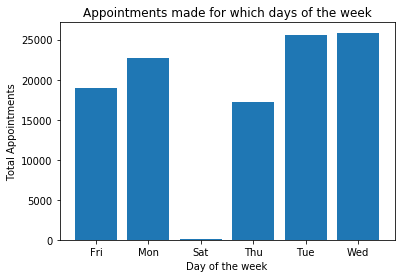

In [27]:
# Create the x-values for the bars
x_appointment = ["Sat", "Thu", "Fri", "Mon", "Tue", "Wed"]

# Create the bar plot using our function
bar_plot(df, x_appointment, appointments_day_count, "Day of the week", "Total Appointments", "Appointments made for which days of the week", )

Appointments were made to take place mostly on Tuedays and Wednesdays. Barely any appointments were supposed to take place on Saturday and no appointments were taking place on Sundays.

#### Age

Let's see the age distribution of the patients

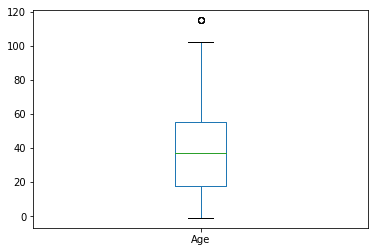

In [28]:
# Create a bar plot for the "age" feature
df['Age'].plot(kind='box')

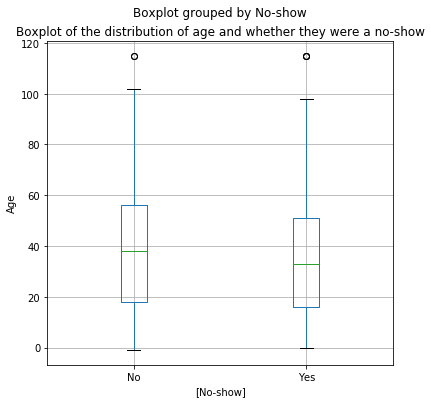

In [29]:
# create another boxplot for the age column for no-shows and also for patients who showed
df.boxplot(column=['Age'], by= ["No-show"], figsize=(6,6))
plt.ylabel('Age')
plt.title('Boxplot of the distribution of age and whether they were a no-show');

We can see that older patients show up slightly more to their appointments than the younger patients.

Now we can re-do this with the new dataframe

#### Neighbourhood

Lets see what we can find out about the neighbourhoods:

In [30]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

We see there are many different neighbourhoods captured in this dataset (81 to be exact). We can see the neighbourhood with the most patients is: 'JARDIM CAMBURI', 'MARIA ORTIZ' and 'RESISTÊNCIA'. We can also visualize it:

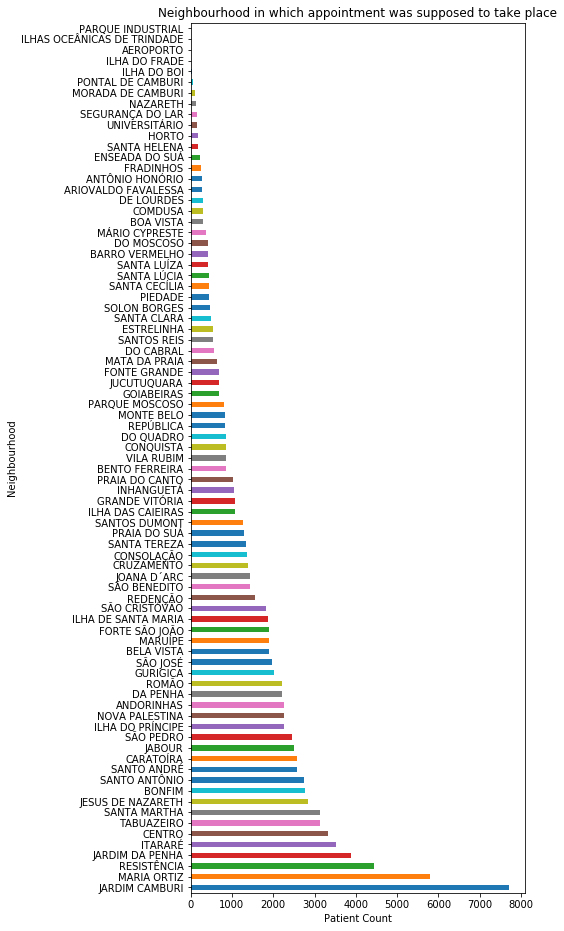

In [31]:
df['Neighbourhood'].value_counts().plot(kind='barh', figsize=(6,16))
plt.title("Neighbourhood in which appointment was supposed to take place")
plt.xlabel("Patient Count")
plt.ylabel("Neighbourhood");

There are a lot of neighbourhoods. If we want to see only the top 10, we can do so as follow:


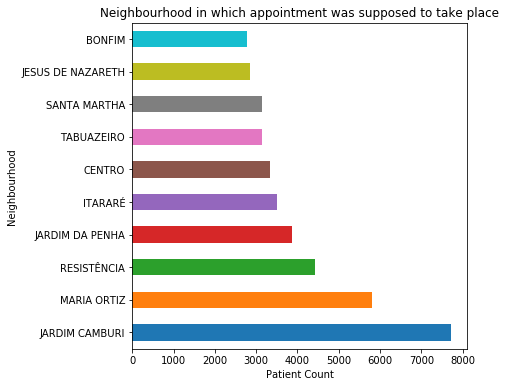

In [32]:
# Only show records at index 0 up to but not including 10
df['Neighbourhood'].value_counts()[:10].plot(kind='barh', figsize=(6,6))
plt.title("Neighbourhood in which appointment was supposed to take place")
plt.xlabel("Patient Count")
plt.ylabel("Neighbourhood");

#### Scholarship

It would also help to know how many patients were enrolled in the Brasilian welfare program 'Bolsa Família'.

In [33]:
scholarship_counts = df['Scholarship'].value_counts()
scholarship_counts

0    99666
1    10861
Name: Scholarship, dtype: int64

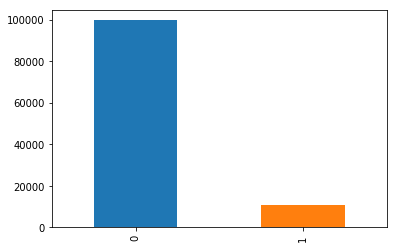

In [34]:
scholarship_counts.plot(kind='bar')

Clearly there are many more patients who are not enrolled for this welfare program. To get a better idea about the distribution, let's view the same data but with proportions instead:

In [35]:
# Create the percentage of patients with and without the scolarship
scholarship_false_percent = scholarship_counts[0] / record_count
scholarship_true_percent = scholarship_counts[1] / record_count

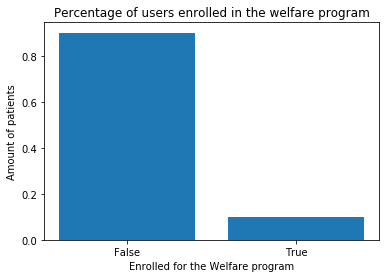

In [36]:
bar_plot(df, ["False", "True"], [scholarship_false_percent, scholarship_true_percent], "Enrolled for the Welfare program", "Amount of patients", "Percentage of users enrolled in the welfare program")

About 90% of the patients were not enrolled in the welfare program.

Let's see the distribution of patients with Hipertension, Diabetes, Alcoholism then patients who are Handicapped. We will do the same analyses on these features as we just did with scholarship.

It is simpler to view these in perecentages so let's create a function to return the percentages of false and true value counts based on the columns:

In [37]:
def get_count_true_and_false(dataframe, column_name):
    # Get the percentage where the value is false by getting the count and dividing by the amount of records
    false_counts = dataframe[column_name].value_counts()[0] / record_count
    # Do the same for the true values
    true_counts = dataframe[column_name].value_counts()[1] / record_count
    # Print the counts
    print("False: ", false_counts, " True: ", true_counts)
    # Return the results
    return (false_counts, true_counts)

#### Hipertension

False:  0.802754078189  True:  0.197245921811


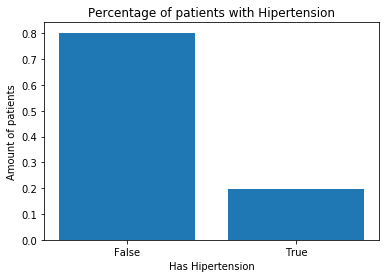

In [38]:
hipertension_false_count, hipertension_true_count = get_count_true_and_false(df, 'Hipertension')
bar_plot(df, ["False", "True"], [hipertension_false_count, hipertension_true_count], "Has Hipertension", "Amount of patients", "Percentage of patients with Hipertension")

About 20% of the patients has hipertension.

#### Diabetes

False:  0.928135206782  True:  0.0718647932179


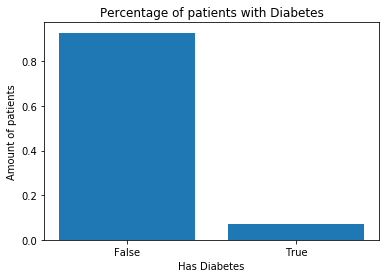

In [39]:
# Get the true and false counts
diabetes_false_count, diabetes_true_count = get_count_true_and_false(df, 'Diabetes')
# call the function to create the barplot
bar_plot(df, ["False", "True"], [diabetes_false_count, diabetes_true_count], "Has Diabetes", "Amount of patients", "Percentage of patients with Diabetes")

92% of the patients do not have diabetes.

#### Alcoholism

False:  0.969600188189  True:  0.0303998118107


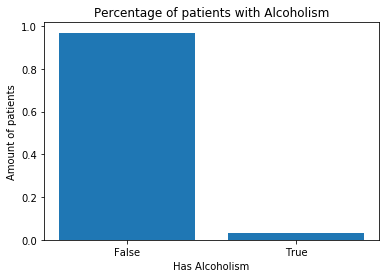

In [40]:
# Get the true and false counts
alcoholism_false_count, alcoholism_true_count = get_count_true_and_false(df, 'Alcoholism')
# call the function to create the barplot
bar_plot(df, ["False", "True"], [alcoholism_false_count, alcoholism_true_count], "Has Alcoholism", "Amount of patients", "Percentage of patients with Alcoholism")

Almost none of the patients have alcoholism with only 0.03%.

#### Handicapped

False:  0.97972441123  True:  0.0184751237254


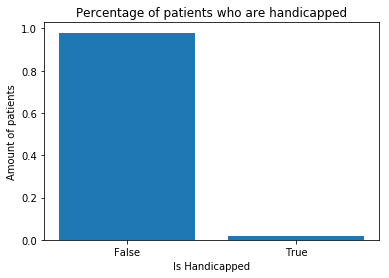

In [41]:
# Get the true and false counts
handicapped_false_count, handicapped_true_count = get_count_true_and_false(df, 'Handcap')

# call the function to create the barplot
bar_plot(df, ["False", "True"], [handicapped_false_count, handicapped_true_count], "Is Handicapped", "Amount of patients", "Percentage of patients who are handicapped")

About 98% of the patients were not handicapped

#### SMS Received

Let's see how many patients received sms reminders about their appointments.

False:  0.678974368254  True:  0.321025631746


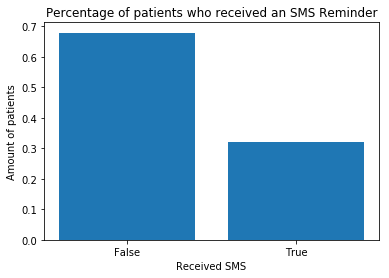

In [42]:
# Get the true and false counts
sms_false_count, sms_true_count = get_count_true_and_false(df, 'SMS_received')

# call the function to create the barplot
bar_plot(df, ["False", "True"], [sms_false_count, sms_true_count], "Received SMS", "Amount of patients", "Percentage of patients who received an SMS Reminder")

Just under 68% of patients did not receive any sms reminders about their appointments.

#### No-show

False:  0.798067440535  True:  0.201932559465


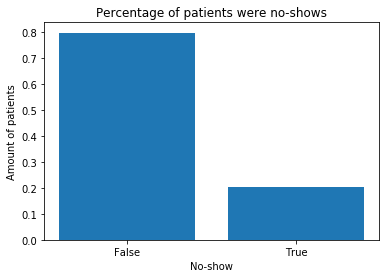

In [43]:
# Get the true and false counts
noshow_false_count, noshow_true_count = get_count_true_and_false(df, 'No-show')

# call the function to create the barplot
bar_plot(df, ["False", "True"], [noshow_false_count, noshow_true_count], "No-show", "Amount of patients", "Percentage of patients were no-shows")

About 80% of the patients did show up for their appointments.

### Are men or women more likely to be a no-show to their medical appoinments?

> Let's see how many men vs women are captured in this dataset:

In [44]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

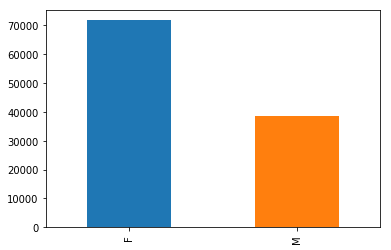

In [45]:
df['Gender'].value_counts().plot(kind='bar');

There are 71840 female and 38687 male patients recorded in this dataset. Note that this does not mean 71840 different females and 38687 different males, since we noticed that there are indeed recurring patients (patients with more than 1 appointment).

We can group the data according to the patient's gender, and count each occurence of male vs female.

In [46]:
# Group data by gender then no-show and get a count of the no-show's
#print(df.groupby(['Gender', 'No-show']).count())
gender_counts = df.groupby(['Gender','No-show'])['No-show'].count()
gender_counts

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

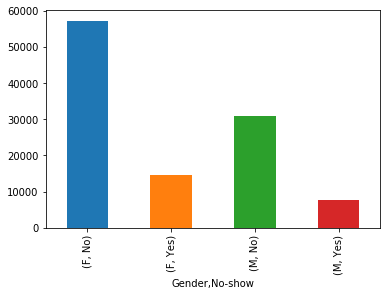

In [47]:
df.groupby(['Gender','No-show'])['No-show'].count().plot(kind='bar')

From the 71840 females, there were 14594 no-shows and 57246 patients who showed up for their appointments.
From the 38687 males, there were 7725 no-shows and 30962 patients who showed up for their appointments.

The problem with this is that there were almost double the amount of female patients as there were male patients. Let's fix this by calculating the values based on each total gender:

In [48]:
female_no_shows = (gender_counts['F']/71840)
male_no_shows = (gender_counts['M']/38687)

In [49]:
# Set the x coordinate location for each rating group and and width of each bar
ind = np.arange(len(female_no_shows))  # the x locations for the groups
width = 0.35       # the width of the bars

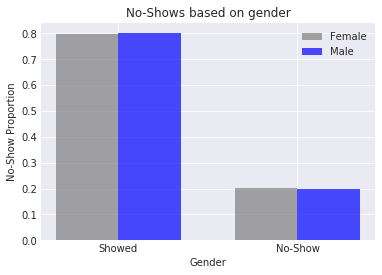

In [50]:
sns.set_style('darkgrid')
# plot bars
red_bars = plt.bar(ind, female_no_shows, width, color='grey', alpha=.7, label='Female')
white_bars = plt.bar(ind + width, male_no_shows, width, color='b', alpha=.7, label='Male')

# title and labels
plt.ylabel('No-Show Proportion')
plt.xlabel('Gender')
plt.title('No-Shows based on gender')
locations = ind + width / 2  # xtick locations
labels = ['Showed', 'No-Show']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

We can now see that there is not a huge difference in the proportions of female who are no-shows vs the males who are no-shows since the proportions are almost identical.

Since we have some patients who attended more than 1 appointment, this graph might not be a real representation of how many of each gender might be a no-show.
We can temporarily create a new dataset where we keep only appointments with unique PatientId's which will allow us to see how many male and female patients there really are.

In [51]:
# Copy the dataset to avoid changes to the one we are working with
df2 = df.copy()

In [52]:
# Drop all rows where we have duplicate PatientIds, but keep the first occurence.
df2 = df2.drop_duplicates(subset=['PatientId'], keep='first')

Now lets review the counts after the modifications:

In [53]:
df2.shape

(62299, 15)

We can see there are now 62299 rows of appointments, which mathches with the amount of unique patients we analyzed earlier.

Let's see the distributions of male and female patients again:

In [54]:
df2.Gender.value_counts()

F    40046
M    22253
Name: Gender, dtype: int64

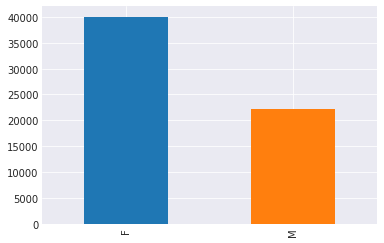

In [55]:
df2['Gender'].value_counts().plot(kind='bar');

Notice that there are almost twice as many female patients as the male, with counts of **40046** female and **22253** male patients.

We are able to adjust our data by keeping only 1 record per unique patient, but then we will need to remove too many rows. We can do this for another analysis, but for this one we will keep it simple and ignore the case that some patients have multiple appointments recorded in this dataset. This might also comlicate our analysis, since we might skew our analysis by only keeping the first appointment (or last) of a patient so we will avoid this for now.


### Are seniors more likely than adults to attend their medical appointments?

Using this link https://www.statcan.gc.ca/en/concepts/definitions/age2 we can divide our data into 4 different age groups. The 4 groups will be as follow: Children (0-14), Youth (15-24), Adults (25-64), Seniors (65+). For our analysis of this question, we will only consider the adults and seniors age groups.

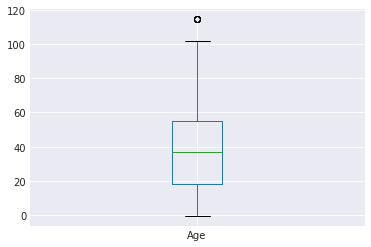

In [56]:
# Find the distributions for age
df.boxplot(column=['Age'])

We can see that there is at least 1 outlier in our dataset passed the upper quartile of the boxplot.

In [57]:
# Find the max age so we know how to group our data
df['Age'].max()

115

In [58]:
# Create the 4 age groups
df['age_groups'] = pd.cut(df['Age'], [0, 14, 24, 64, 115], labels=['0-14', '15-24', '25-64', '65+'])

In [59]:
# View the data
df[['Age', 'age_groups']].head()

,Age,age_groups
0,62,25-64
1,56,25-64
2,62,25-64
3,8,0-14
4,56,25-64


Now that we have added each patient into an age group, let's see the distribution of patients in each age group:

In [60]:
age_group_counts = df['age_groups'].value_counts()
age_group_counts

25-64    58857
0-14     19718
65+      14402
15-24    14010
Name: age_groups, dtype: int64

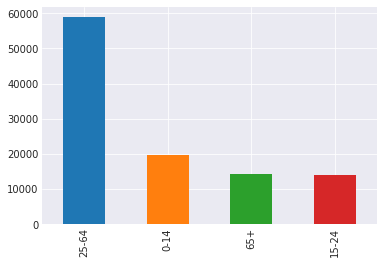

In [61]:
age_group_counts.plot(kind='bar')

We can see that over halve of the patients fall under the "Adult" age group, where senior and youth are almost tied with the least amount of patients in these groups.

We are only interested in the Adults and Senior age groups right now, let's isolate them:

In [62]:
group_counts = df.groupby(['age_groups', 'No-show']).count()['Gender'].iloc[4:8]
group_counts

age_groups  No-show
25-64       No         47237
            Yes        11620
65+         No         12169
            Yes         2233
Name: Gender, dtype: int64

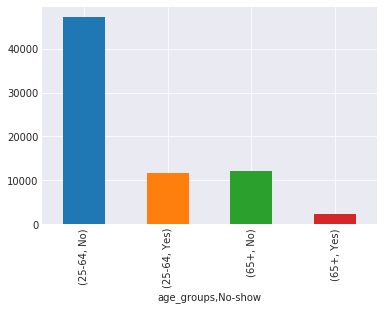

In [63]:
group_counts.plot(kind='bar')

From the graph above, it appears that Adults who attended their appointments were a lot more than the patients in the Senior group.
Once again, this information doesn't take proportions into account, and since there are many more patients in the Adults group, it is a better idea to use proportions again (as we did with gender).

In [64]:
# Get the total count for both age groups seperate
age_group_counts_totals = df.groupby(['age_groups']).count()['Gender']
age_group_counts_totals

age_groups
0-14     19718
15-24    14010
25-64    58857
65+      14402
Name: Gender, dtype: int64

There are **58857** patients in the Adult age group, and **14402** patients in the Seniors age group.

Let's use this to use proportions instead, since there are many more adults patients than senior.

In [65]:
adult_proportions_no_show =  group_counts['25-64'] / age_group_counts_totals['25-64']
adult_proportions_no_show

No-show
No     0.802572
Yes    0.197428
Name: Gender, dtype: float64

In [66]:
senior_proportions_no_show = group_counts['65+']/ age_group_counts_totals['65+']
senior_proportions_no_show

No-show
No     0.844952
Yes    0.155048
Name: Gender, dtype: float64

In [67]:
ind = np.arange(len(senior_proportions_no_show))  # the x locations for the groups
width = 0.35       # the width of the bars

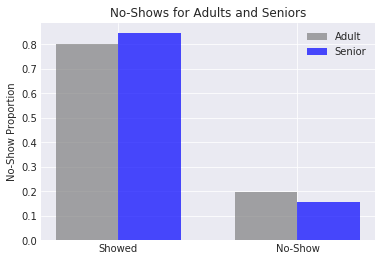

In [68]:
sns.set_style('darkgrid')
# plot bars
red_bars = plt.bar(ind, adult_proportions_no_show, width, color='grey', alpha=.7, label='Adult')
white_bars = plt.bar(ind + width, senior_proportions_no_show, width, color='b', alpha=.7, label='Senior')

# title and labels
plt.ylabel('No-Show Proportion')
plt.title('No-Shows for Adults and Seniors')
locations = ind + width / 2  # xtick locations
labels = ['Showed', 'No-Show']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

We can see that adults seem to be a no-show more often than a senior. This could be since seniors are more serious about their health.

### Does the location of an appointment have an influence on whether a person shows up for an appointment?

We saw the distribution of appointments into the different neighbourhoods, but does the locations of the appointment have an effect on whether or not a person will cancel?

In [69]:
# Group the data by neighbourhood and find the counts for no-shows
neighbourhood_counts = df.groupby(['Neighbourhood'])['No-show'].value_counts().to_frame(name='count').reset_index()

# Save the records of the patients which were no-shows only
location_no_show = neighbourhood_counts[neighbourhood_counts['No-show'] == 'Yes']

# View the saved records
location_no_show.head()

,Neighbourhood,No-show,count
1,AEROPORTO,Yes,1
3,ANDORINHAS,Yes,521
5,ANTÔNIO HONÓRIO,Yes,50
7,ARIOVALDO FAVALESSA,Yes,62
9,BARRO VERMELHO,Yes,91


In [70]:
# Group the data by counts so we can see how many appointments took place in which neighbourhoods
location_counts = df.groupby(['Neighbourhood'])['PatientId'].count().to_frame(name='total').reset_index()

# View the data
location_counts.head()

,Neighbourhood,total
0,AEROPORTO,8
1,ANDORINHAS,2262
2,ANTÔNIO HONÓRIO,271
3,ARIOVALDO FAVALESSA,282
4,BARRO VERMELHO,423


Now that we have 2 dataframes - one with the total counts per neighbourhood and another with the total no-shows for each neighbourhood, we can combine them into a single dataframe which will make performing calculations easier.

In [71]:
# Merge the 2 frames into a new one
combined = location_no_show.merge(location_counts)

In [72]:
# Create a new column and store the % no--shows per neghbourhood by dividing by the total
combined['% no-shows'] = combined['count'] / combined['total'] * 100

# View the data
combined.head()

,Neighbourhood,No-show,count,total,% no-shows
0,AEROPORTO,Yes,1,8,12.500000
1,ANDORINHAS,Yes,521,2262,23.032714
2,ANTÔNIO HONÓRIO,Yes,50,271,18.450185
3,ARIOVALDO FAVALESSA,Yes,62,282,21.985816
4,BARRO VERMELHO,Yes,91,423,21.513002


Now that we have the % of no-shows per neighbourhood, we can easily see the differences in the neighbourhoods"

In [73]:
# Find the neighbourhoods where 25% or more appointments were no-show
combined[combined['% no-shows'] > 25].sort_values(by='% no-shows')

,Neighbourhood,No-show,count,total,% no-shows
36,ITARARÉ,Yes,923,3514,26.266363
61,SANTA CLARA,Yes,134,506,26.482213
60,SANTA CECÍLIA,Yes,123,448,27.455357
69,SANTOS DUMONT,Yes,369,1276,28.918495
34,ILHAS OCEÂNICAS DE TRINDADE,Yes,2,2,100.000000


Above we can see there are 5 neighbourhoods which had 25% or more no-show appointments.

The neighbourhood 'ILHAS OCEÂNICAS DE TRINDADE' has a 100% no-show rate, but there were only 2 appointments recorded so there is not enough data to make any conclusions for this neighbourhood.

In [74]:
# Find the neighbourhoods where 15% or less appointments were no-show
combined[combined['% no-shows'] < 15].sort_values(by='% no-shows')

,Neighbourhood,No-show,count,total,% no-shows
31,ILHA DO BOI,Yes,3,35,8.571429
0,AEROPORTO,Yes,1,8,12.500000
48,MÁRIO CYPRESTE,Yes,54,371,14.555256
72,SOLON BORGES,Yes,69,469,14.712154


Above we can also see there are 4 neighbourhoods with less than 15% no-show appointments. These neighbourhoods have a little better attendance for the appointments than the previous ones.

#### Are appointments schedueled in advance more likely to be attended oppposed to appointments made for the same day?

We can create 2 new dataframes where one would contain the records of appointments scheduled on the same day that it should take place, and another where scheduleday is not on the same day as the appointment.

In [75]:
# Create new dataframe where scheduleday is the same as appointmentday
df_same_day = df[df['ScheduledDay'] == df['AppointmentDay'] ]
df_same_day.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime,age_groups
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,25-64
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,25-64
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,25-64
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0-14
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,25-64


In [76]:
# Create new dataframe where scheduleday is not the same as appointmentday
df_not_same_day = df[df['ScheduledDay'] != df['AppointmentDay']]
df_not_same_day.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime,age_groups
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,08:36:51,65+
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15:05:12,15-24
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15:39:58,25-64
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,12:48:25,15-24
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,14:58:11,25-64


In [77]:
# Get the count for the appointments where scheduleday is the same as the appointmentday
same_day_appointment_count = len(df_same_day)
same_day_appointment_count

38563

In [78]:
# Get the count for the appointments where scheduleday is not the same as the appointmentday
not_same_day_appointment_count = len(df_not_same_day)
not_same_day_appointment_count

71964

In [79]:
# Group the same-day data by no-show and get the counts
df_same_day.groupby(['No-show'])['PatientId'].count()

No-show
No     36771
Yes     1792
Name: PatientId, dtype: int64

In [80]:
# Save the counts
showed_same_day, no_show_same_day = df_same_day.groupby(['No-show'])['PatientId'].count()

In [81]:
# Group the not same-day data by no-show and get the counts
df_not_same_day.groupby(['No-show'])['PatientId'].count()

No-show
No     51437
Yes    20527
Name: PatientId, dtype: int64

In [82]:
# Save the counts
showed_not_same_day, no_show_not_same_day = df_not_same_day.groupby(['No-show'])['PatientId'].count()

In [83]:
# Get the percentage of the no-shows where appointment and scheduleday is the same
no_show_not_same_day_percentage = no_show_not_same_day / not_same_day_appointment_count * 100
no_show_not_same_day_percentage

28.523984214329385

In [84]:
# Get the percentage of the no-shows where appointment and scheduleday is not the same
no_show_same_day_percentage = no_show_same_day / same_day_appointment_count * 100
no_show_same_day_percentage

4.6469413686694505

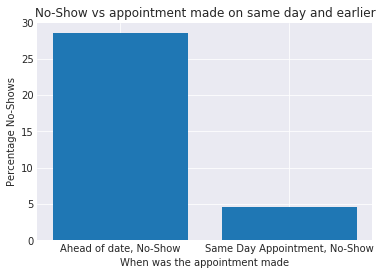

In [85]:
# Plot the data
bar_plot(df, ["Same Day Appointment, No-Show", "Ahead of date, No-Show"], [no_show_same_day_percentage, no_show_not_same_day_percentage], "When was the appointment made", "Percentage No-Shows", "No-Show vs appointment made on same day and earlier")

By placing the bars next to each other for the no-shows, we see that about 28% of the patients who scheduled on a prior day to the appointment were no-shows whereas 4.6% of the appointments made on the same day as what the appointments were scheduled for were no-shows.

From this data, it seems that appointments scheduled for the same day has a higher attendance than appointments made in advance (on a prior day).

#### Do SMS reminders to the patient have an effect on whether they attend their appointments?

Some of the patients received SMS reminders about their appointments. It would be great if we could find out if it makes a difference on whether or not an appointment will be attended or not. Despite the result, we do not know if the person read the SMS.

To start, let's seperate the records into 2 seperate dataframes, one where patients received an SMS and one where they did not.

In [86]:
# Apply a mask and keep only records where SMS_received is true
received_SMS = df[ df['SMS_received'] == True ]
received_SMS.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime,age_groups
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,08:44:12,25-64
15,9.994839e+10,5620206,F,2016-04-26,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No,08:47:27,15-24
18,1.713538e+13,5621836,F,2016-04-26,2016-04-29,30,NOVA PALESTINA,1,0,0,0,0,1,No,10:54:18,25-64
22,8.632298e+14,5616091,M,2016-04-25,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes,13:29:16,0-14
25,5.819370e+12,5624020,M,2016-04-26,2016-04-29,46,CONQUISTA,0,1,0,0,0,1,No,15:04:17,25-64


In [87]:
# Apply a mask and keep only records where SMS_received is false
not_received_SMS = df[ df['SMS_received'] == False ]
not_received_SMS.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime,age_groups
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,25-64
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,25-64
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,25-64
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0-14
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,25-64


In [88]:
# Save the totals so we can get the percentages
received_sms_total = len(received_SMS)
not_received_sms_total = len(not_received_SMS)

In [89]:
received_SMS.groupby(['No-show'])['PatientId'].count()

No-show
No     25698
Yes     9784
Name: PatientId, dtype: int64

In [90]:
# Save the results in variables
received_SMS_no_show_false, received_SMS_no_show_true = received_SMS.groupby(['No-show'])['PatientId'].count()
not_received_SMS_no_show_false, not_received_SMS_no_show_true = not_received_SMS.groupby(['No-show'])['PatientId'].count()

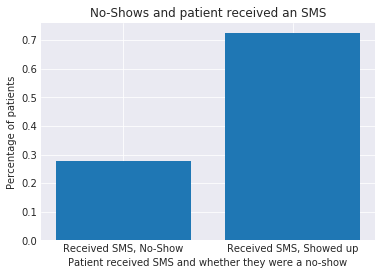

In [91]:
# Plot the barplot for the patients who received an SMS
title = "No-Shows and patient received an SMS"
xticks = ['Received SMS, No-Show', 'Received SMS, Showed up']
height = [received_SMS_no_show_true / received_sms_total, received_SMS_no_show_false / received_sms_total]
xlabel = 'Patient received SMS and whether they were a no-show'
ylabel = 'Percentage of patients'
bar_plot(df, xticks, height, xlabel, ylabel, title)

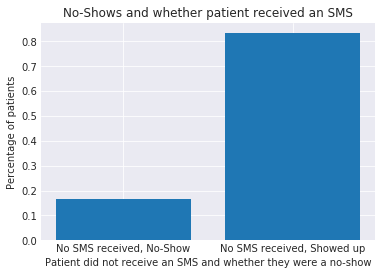

In [92]:
# Plot the barplot for the patients who did not receive an SMS
title = "No-Shows and whether patient received an SMS"
xticks = ['No SMS received, No-Show', 'No SMS received, Showed up']
height = [not_received_SMS_no_show_true / not_received_sms_total, not_received_SMS_no_show_false / not_received_sms_total]
xlabel = 'Patient did not receive an SMS and whether they were a no-show'
ylabel = 'Percentage of patients'
bar_plot(df, xticks, height, xlabel, ylabel, title)

By comparing the above 2 bar-plots, we see that about 10% more appointments were attended when no sms was received.

<a id='conclusions'></a>
## Conclusions

> We saw that there was no clear indication that male patients were no-shows more often than female patients (and vice-versa). These results do not imply that male and female patients show up the same amount to their appointments, but we don't have enough information to imply otherwise.

> With regards to the age-groups, we noticed that patientsin the Senior age group seem to attend their appointments more often than the patients in the Adult age groups. This analysis is based on proportions, since we saw there are more than double the amount of adult patients opposed to the senior patients.

> **Limitations:** It was difficult to get accurate conclusions since some patients had multiple appointments, where some had only 1. We could have chosen to only keep 1 record of each appointment per patient, but this could cause unintentional bias. Another limitation is some missing data. We did not have the time for when the appointment was supposed to take place, we only had the date avaialable so we couldn't do much analysis with regards to the exact times.

In [93]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0